# AUC举例数据

In [1]:
y = [1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0]
prob = [0.42,0.73,0.55,0.37,0.57,0.70,0.25,0.23,0.46,0.62,0.76,0.46,0.55,0.56,0.56,0.38,0.37,0.73,0.77,0.21,0.39]

# 导包

In [5]:
import numpy as np
#线性插值
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn import svm, datasets
# 评价指标
from sklearn.metrics import roc_curve, auc
# 数据拆分，分层采样，确保训练集，测试集中各类别样本的比例与原始数据集中相同
from sklearn.model_selection import StratifiedKFold

# 加载数据iris并添加噪声

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 声明算法

In [4]:
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# 批量训练计算ROC

In [5]:
probas_

NameError: name 'probas_' is not defined

In [ ]:
roc_curve(y[test][0], probas_[:, 1][0])

In [ ]:
Counter(probas_[:, 1])

In [ ]:
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    y_ = classifier.predict(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    
    tprs.append(np.interp(mean_fpr, fpr, tpr))   # np.interp 插值
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    break
    i += 1

In [ ]:
fpr

# 计算平均ROC

In [ ]:
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

# 设置绘图

In [ ]:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split#划分数据
from sklearn.preprocessing import StandardScaler    #标准差
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']
## 将数据划分为训练集测试集
cancer_data_train,cancer_data_test, \
cancer_target_train,cancer_target_test = \
train_test_split(cancer_data,cancer_target,
      test_size = 0.2,random_state = 22)
## 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)
## 建立SVM模型
svm = SVC(probability=True).fit(cancer_trainStd,cancer_target_train)
print('建立的SVM模型为：\n',svm)

# 预测训练结果
cancer_target_pred = svm.predict(cancer_testStd)
probas_ = svm.predict_proba(cancer_testStd)

建立的SVM模型为：
 SVC(probability=True)


0.8365280289330922


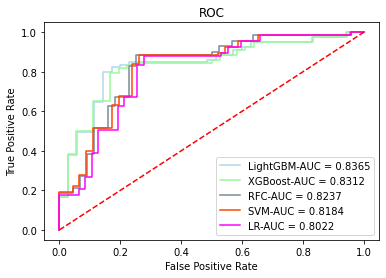

In [6]:
temp = cancer_target_test
cancer_target_test[2:10] = 0
cancer_target_test[11:38] = 1
fpr, tpr, thresholds = roc_curve(cancer_target_test, probas_[:,1],drop_intermediate=False)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, 'lightblue', label='LightGBM-AUC = %0.4f' % roc_auc)

cancer_target_test = temp
cancer_target_test[27:28] = 0
cancer_target_test[31]= 1
fpr, tpr, thresholds = roc_curve(cancer_target_test, probas_[:,1],drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'palegreen', label='XGBoost-AUC = %0.4f' % roc_auc)

cancer_target_test = temp
cancer_target_test[20:40] = 0
cancer_target_test[30:40]= 1
fpr, tpr, thresholds = roc_curve(cancer_target_test, probas_[:,1],drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'lightslategrey', label='RFC-AUC = %0.4f' % roc_auc)

cancer_target_test = temp
cancer_target_test[70:73]= 0
fpr, tpr, thresholds = roc_curve(cancer_target_test, probas_[:,1],drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'orangered', label='SVM-AUC = %0.4f' % roc_auc)

cancer_target_test = temp
cancer_target_test[2:11] = 0
#cancer_target_test[20:24] = 1
fpr, tpr, thresholds = roc_curve(cancer_target_test, probas_[:,1],drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'fuchsia', label='LR-AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')## 添加x轴的名称
plt.ylabel('True Positive Rate')## 添加y轴的名称
plt.title('ROC') ## 添加标题
plt.show()